In [1]:
!nvidia-smi

Sat Mar 30 13:11:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196 --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/data
%cd {HOME}/data

/content/data


In [6]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00


In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="moK39t1xU0mQDNQGKPFN")
project = rf.workspace("roboflow-100").project("soccer-players-5fuqs")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to soccer-players-1 in yolov8:: 100%|██████████| 338/338 [00:00<00:00, 3447.03it/s]


In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 141MB/s] 
New https://pypi.org/project/ultralytics/8.1.37 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data/soccer-players-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_bu

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1711804560.21da30cd8228.1610.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch120.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch121.jpg	weights
P_curve.png					    train_batch122.jpg


/content


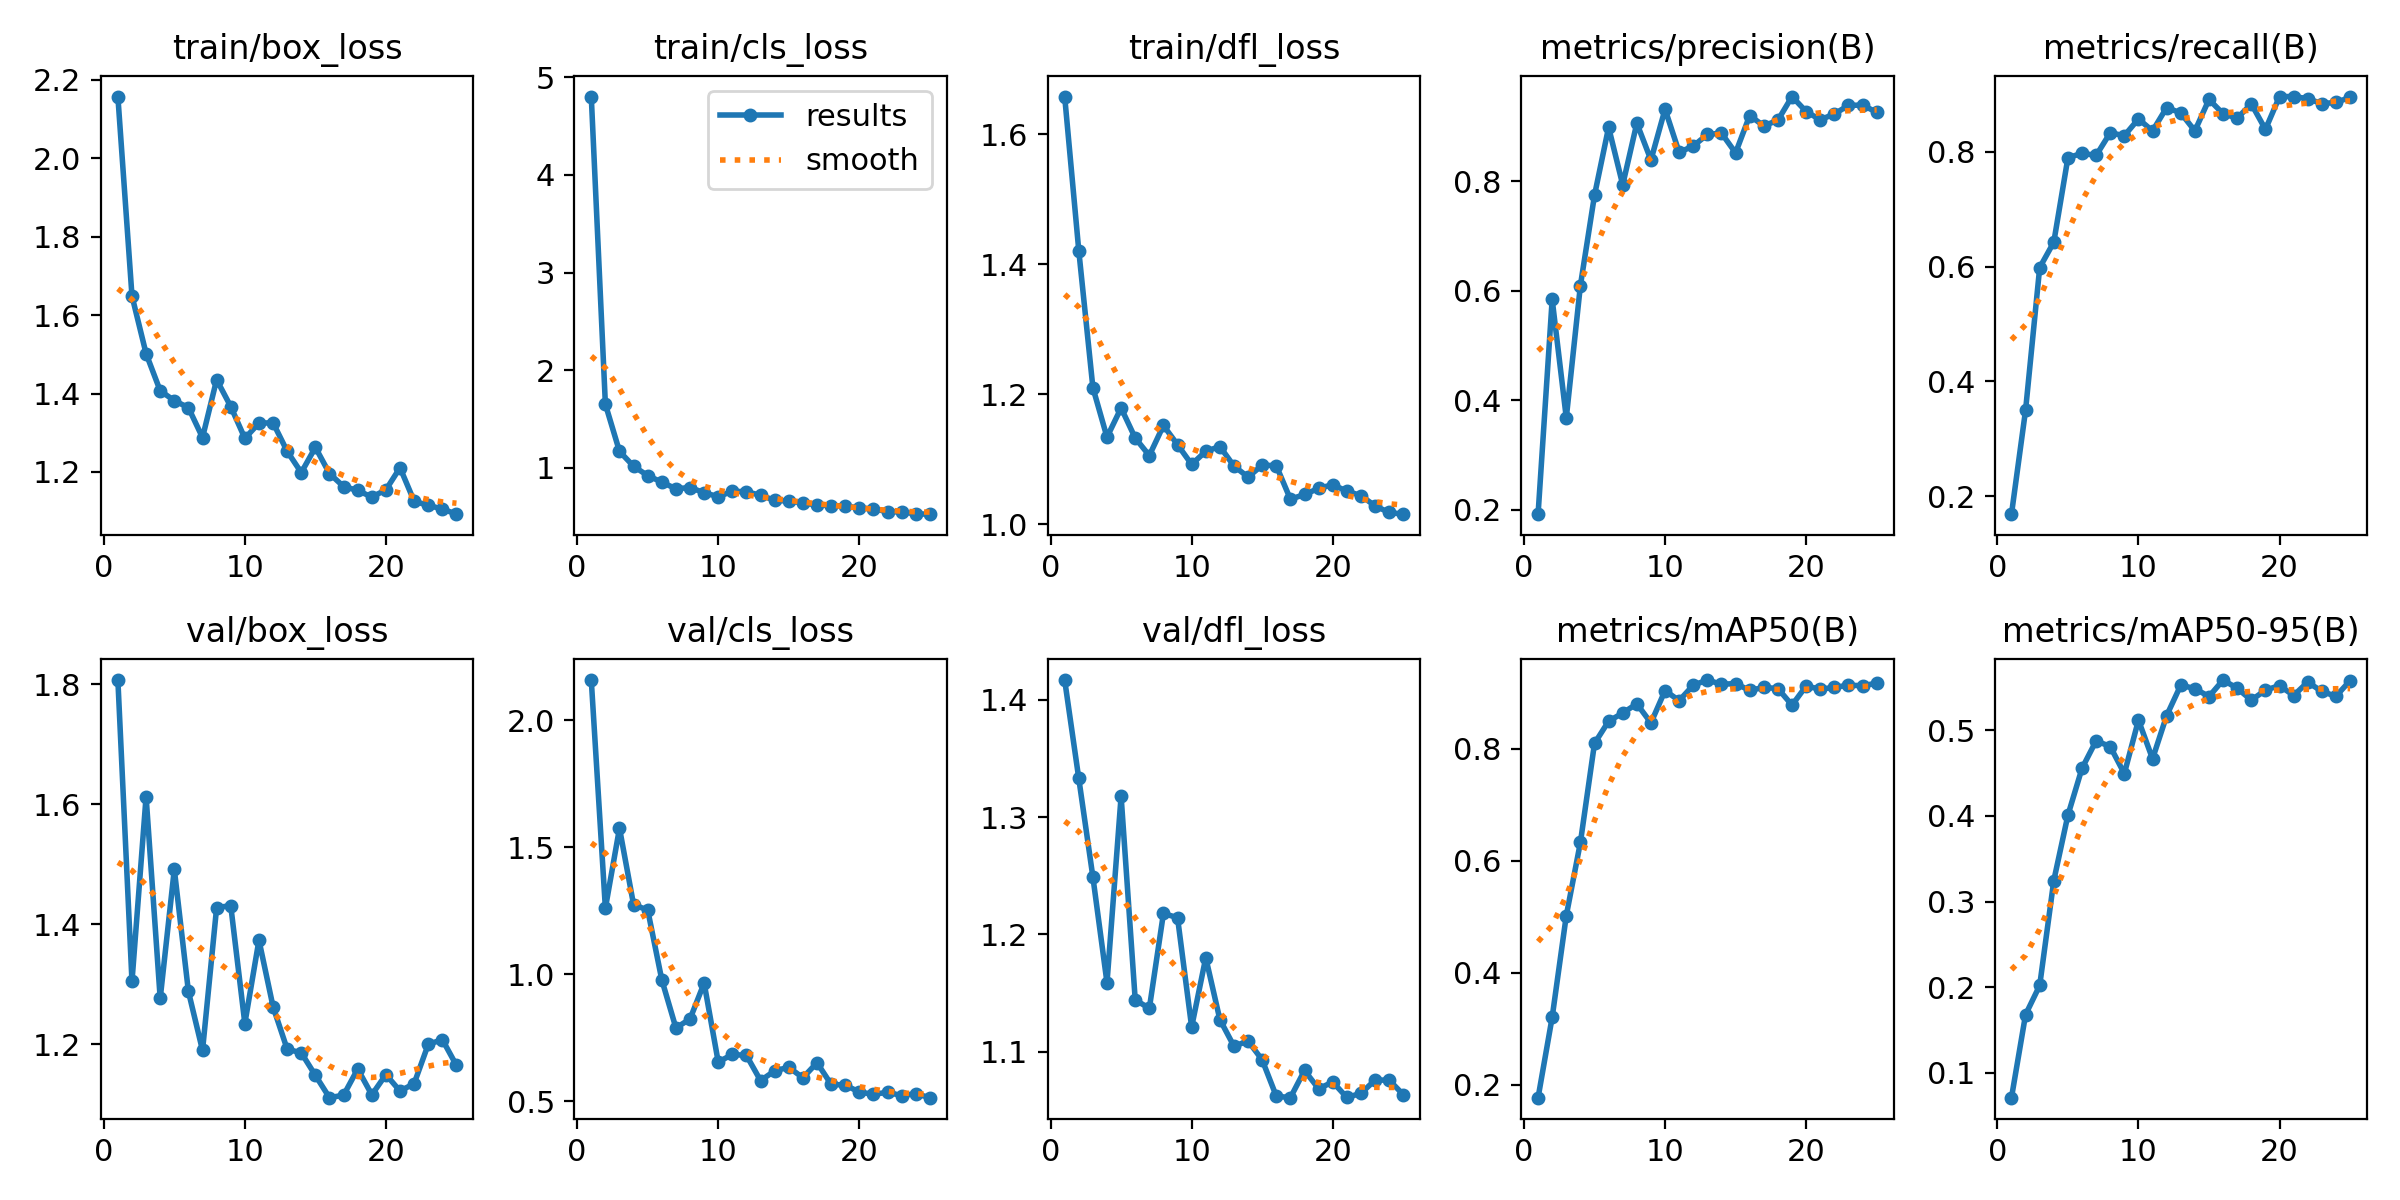

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


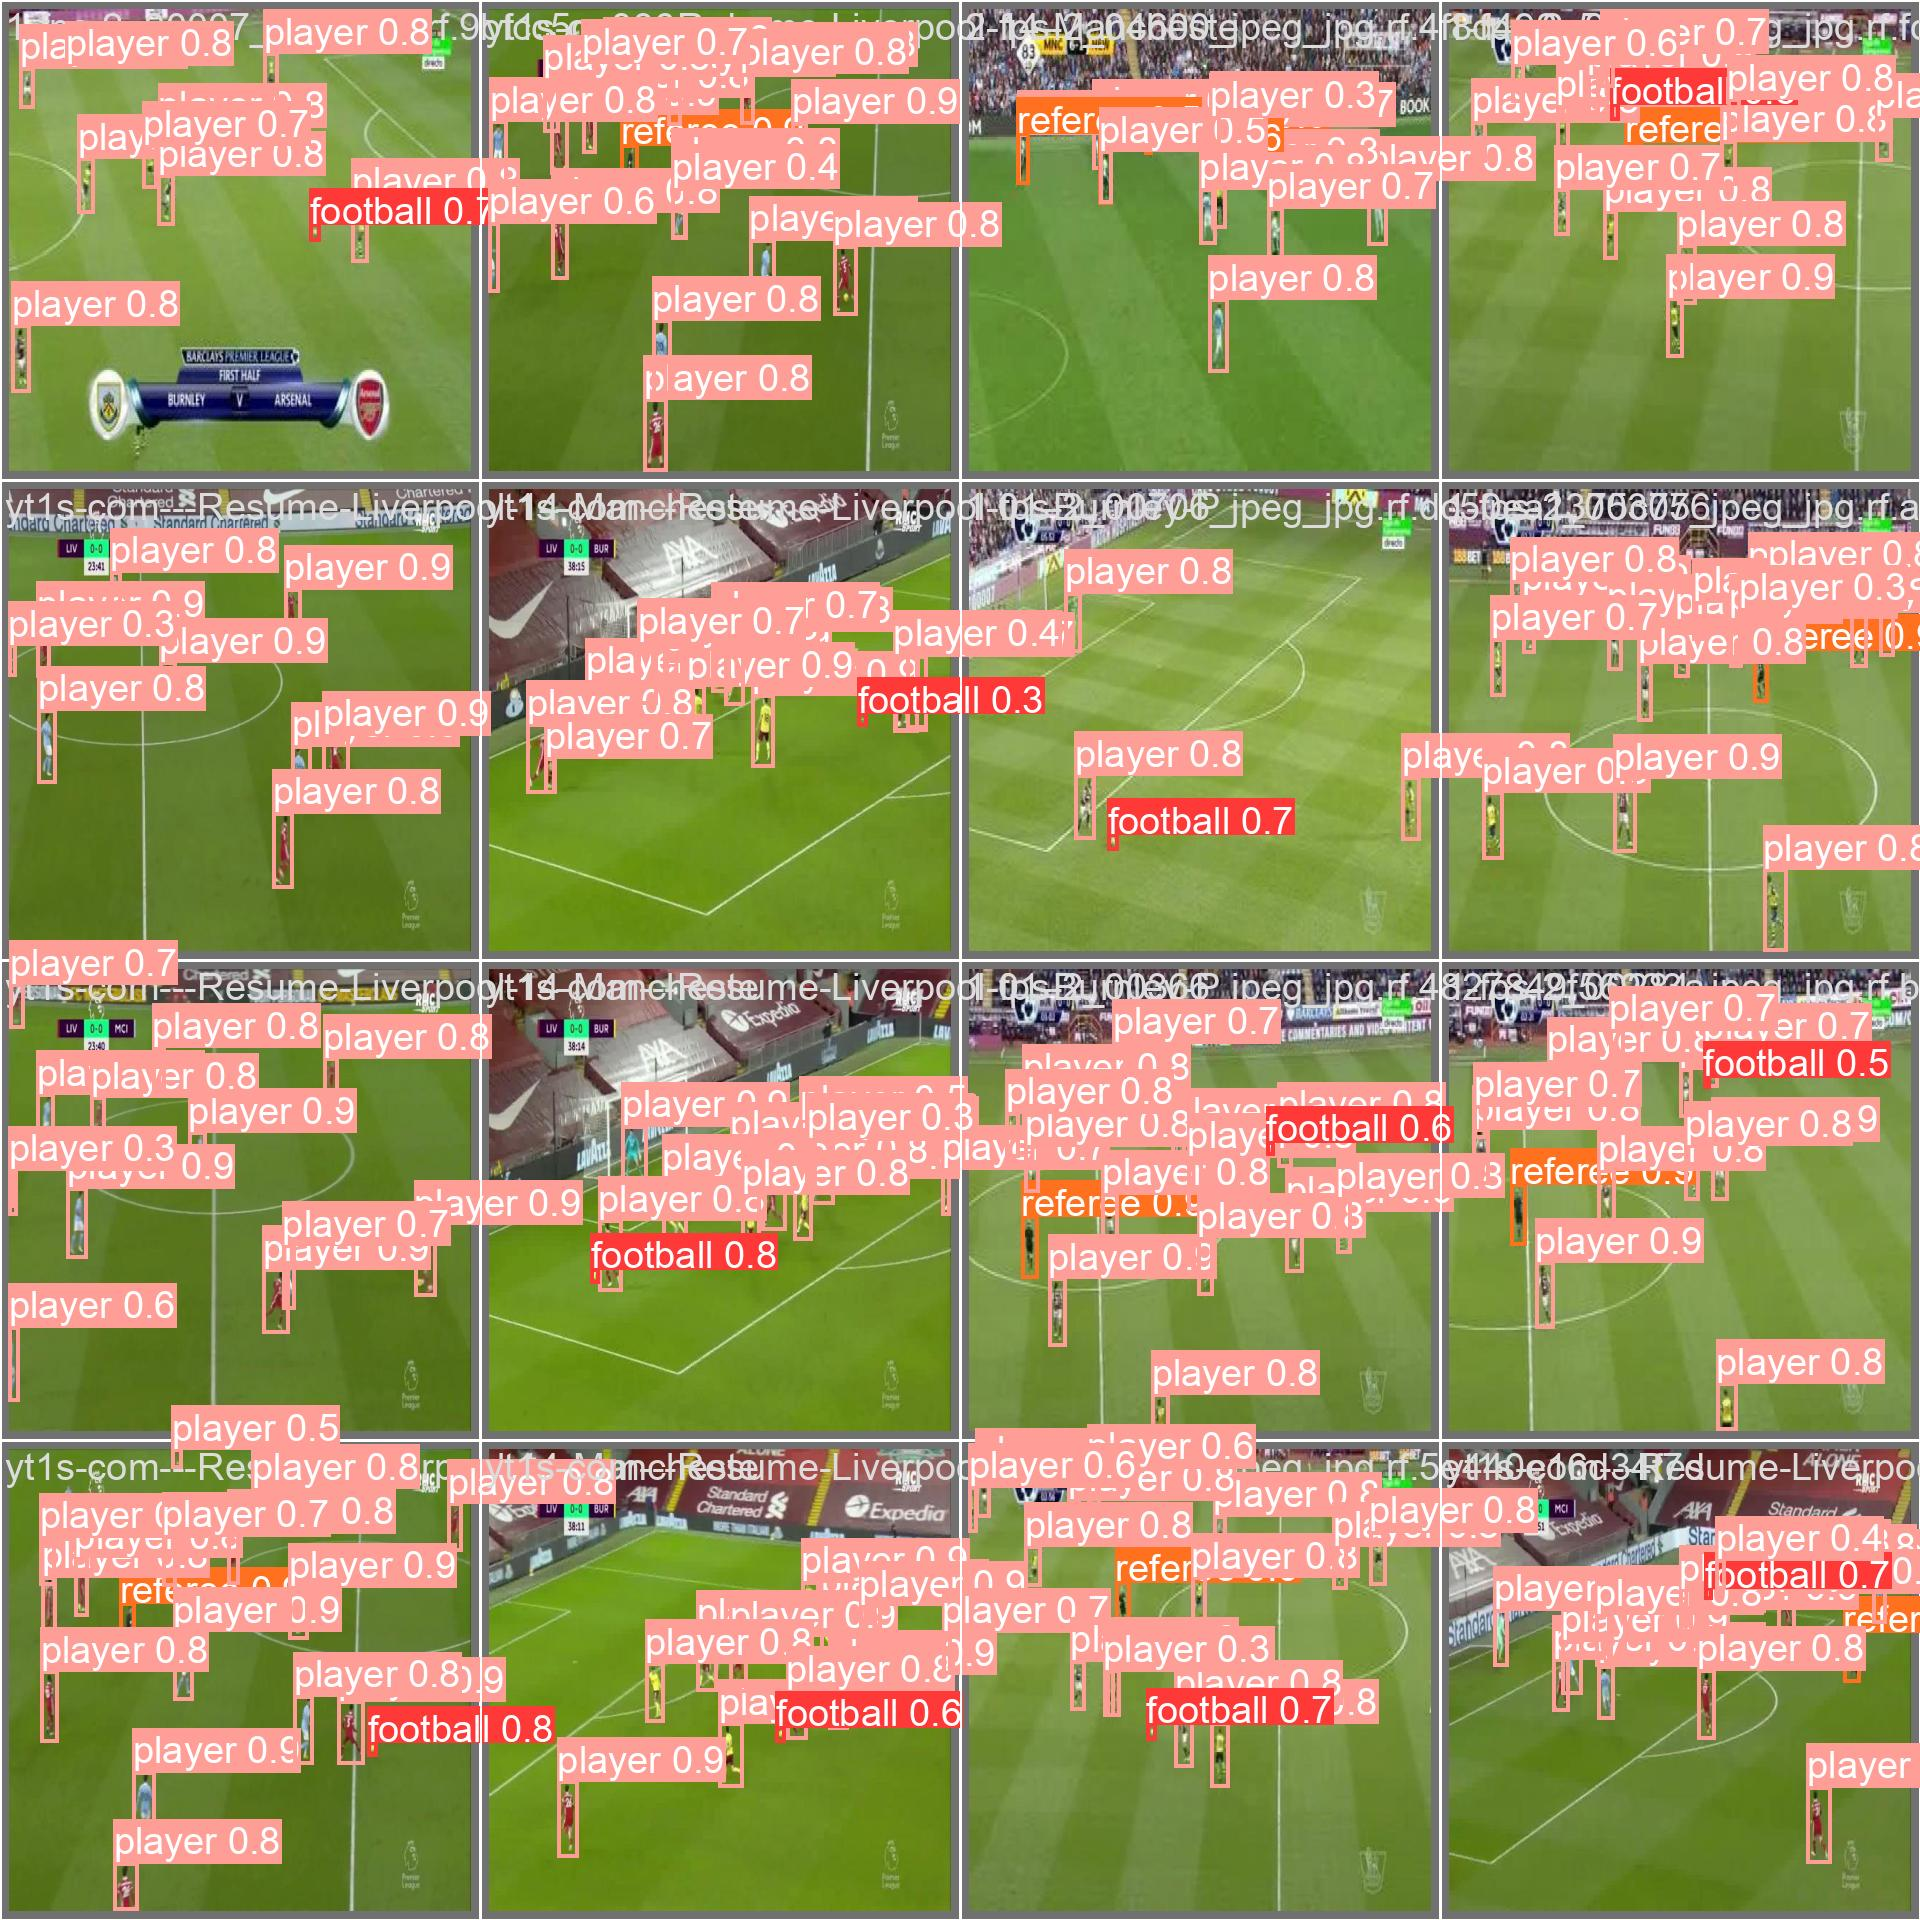

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/data/soccer-players-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.46s/it]
                   all         33        407      0.927      0.895      0.917      0.555
              football         33         28      0.946       0.75        0.8      0.332
                player         33        359      0.975      0.984      0.993      0.659
               referee         33         20      0.859       0.95      0.957      0.672
Speed: 8.0ms preprocess, 42.6ms inference, 0.0ms loss, 24.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/16 /content/data/soccer-players-1/test/images/1-fps-2_00001_jpeg_jpg.rf.7e6fb44050aa614a7003e79297cab088.jpg: 800x800 1 football, 19 players, 1 referee, 22.5ms
image 2/16 /content/data/soccer-players-1/test/images/1-fps-2_00014_jpeg_jpg.rf.b2807ee897ff22ba353b845d34e8222b.jpg: 800x800 1 football, 5 players, 22.5ms
image 3/16 /content/data/soccer-players-1/test/images/1-fps-2_00022_jpeg_jpg.rf.19d5065bff5f9f4867f9f5296da767af.jpg: 800x800 1 football, 8 players, 22.5ms
image 4/16 /content/data/soccer-players-1/test/images/1-fps-2_00025_jpeg_jpg.rf.666ff9d0ffccf61080ce844fd16fed3a.jpg: 800x800 1 football, 5 players, 22.5ms
image 5/16 /content/data/soccer-players-1/test/images/1-fps-2_00032_jpeg_jpg.rf.9233ac761e87c930e1945a58b956f926.jpg: 800x800 6 players, 22.5ms

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
%cd {HOME}
video_path_or_url = 'https://www.youtube.com/watch?v=1CB_xGYibQU'

# Run detection on the video
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={video_path_or_url} save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

1/1: https://www.youtube.com/watch?v=1CB_xGYibQU... Success ✅ (60724 frames of shape 1920x1080 at 60.00 FPS)

[https @ 0x5bfdfe81c700] Cannot reuse HTTP connection for different host: rr1---sn-vgqsknsk.googlevideo.com:-1 != rr1---sn-qxo7rn7k.googlevideo.com:-1
0: 480x800 (no detections), 1515.9ms
0: 480x800 (no detections), 30.6ms
[https @ 0x5bfdfe7522c0] Cannot reuse HTTP connection for different host: rr1---sn-vgqsknsk.googlevideo.com:-1 != rr1---sn-qxo7rn7k.googlevideo.com:-1
WARNING ⚠️ NMS time limit 0.550s exceeded
0: 480x800 1 player, 13.0ms
0: 480x800 (no detections), 7.5ms
0: 480x800 (no detections), 13.6ms
0: 480x800 (no detections), 13.3ms
0: 480x800 (no detections), 25.3ms
0: 480x800 (no detections), 15.6ms
0: 480x800 1 football, 1 player, 15.8ms
0: 480x800 1 football, 1 player, 15.6ms
0: 480x800 2 

In [26]:
from google.colab import files

# Upload the video file and get the file name
uploaded_files = files.upload()

Saving KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights.mp4 to KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).mp4


In [27]:
video_filename = next(iter(uploaded_files))

# Run detection on the uploaded video file
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="$video_filename" save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/2066) /content/KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).mp4: 480x800 18 players, 1 referee, 107.4ms
video 1/1 (2/2066) /content/KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).mp4: 480x800 23 players, 1 referee, 15.7ms
video 1/1 (3/2066) /content/KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).mp4: 480x800 20 players, 1 referee, 15.6ms
video 1/1 (4/2066) /content/KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).mp4: 480x800 18 players, 1 referee, 15.6ms
video 1/1 (5/2066) /content/KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).mp4: 480x800 18 players, 1 referee, 15.7ms
video 1/1 (6/2066) /content/KEVIN DE BRUYNE SCORES TWI

In [28]:
!ls runs/detect/predict4

'KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).avi'


In [30]:
from google.colab import files

# Replace 'processed_video.mp4' with the actual name of the processed video file
processed_video_file = 'runs/detect/predict4/KEVIN DE BRUYNE SCORES TWICE! _ Man City vs Arsenal _ Premier League Highlights (2).avi'
files.download(processed_video_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>